In [ ]:
# import the necessary packages
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt

def align_images(image, template, maxFeatures=500, keepPercent=0.2,
	debug=False):
	# convert both the input image and template to grayscale
	imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
	# use ORB to detect keypoints and extract (binary) local
	# invariant features
	orb = cv2.ORB_create(maxFeatures)
	(kpsA, descsA) = orb.detectAndCompute(imageGray, None)
	(kpsB, descsB) = orb.detectAndCompute(templateGray, None)
	# match the features
	method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
	matcher = cv2.DescriptorMatcher_create(method)
	matches = matcher.match(descsA, descsB, None)
	# sort the matches by their distance (the smaller the distance,
	# the "more similar" the features are)
	matches = sorted(matches, key=lambda x:x.distance)
	# keep only the top matches
	keep = int(len(matches) * keepPercent)
	matches = matches[:keep]
	# check to see if we should visualize the matched keypoints
	if debug:
		matchedVis = cv2.drawMatches(image, kpsA, template, kpsB,
			matches, None)
		matchedVis = imutils.resize(matchedVis, width=1000)
		plt.imshow( matchedVis)
	
	# allocate memory for the keypoints (x, y)-coordinates from the
	# top matches -- we'll use these coordinates to compute our
	# homography matrix
	ptsA = np.zeros((len(matches), 2), dtype="float")
	ptsB = np.zeros((len(matches), 2), dtype="float")
	# loop over the top matches
	for (i, m) in enumerate(matches):
		# indicate that the two keypoints in the respective images
		# map to each other
		ptsA[i] = kpsA[m.queryIdx].pt
		ptsB[i] = kpsB[m.trainIdx].pt
	# compute the homography matrix between the two sets of matched
	# points
	(H, mask) = cv2.findHomography(ptsA, ptsB, method=cv2.RANSAC)
	# use the homography matrix to align the images
	(h, w) = template.shape[:2]
	aligned = cv2.warpPerspective(image, H, (w, h))
	# return the aligned image
	return aligned

In [ ]:

import numpy as np
import argparse
import imutils
import cv2


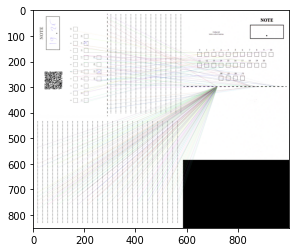

In [ ]:

image = cv2.imread("/content/19_25.png")
template = cv2.imread("/content/exam.png")
# align the images

aligned = align_images(image, template, debug=True)

In [ ]:
# resize both the aligned and template images so we can easily
# visualize them on our screen
aligned = imutils.resize(aligned, width=700)
template = imutils.resize(template, width=700)
# our first output visualization of the image alignment will be a
# side-by-side comparison of the output aligned image and the
# template
stacked = np.hstack([aligned, template])

In [ ]:
# our second image alignment visualization will be *overlaying* the
# aligned image on the template, that way we can obtain an idea of
# how good our image alignment is
overlay = template.copy()
output = aligned.copy()
cv2.addWeighted(overlay, 0.5, output, 0.5, 0, output)

array([[[254, 254, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[252, 254, 255],
        [252, 254, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[236, 236, 234],
        [237, 236, 235],
        [238, 238, 236],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[236, 236, 234],
        [238, 237, 236],
        [238, 238, 236],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[237, 236, 235],
        [238, 238, 236],
        [238, 238, 237],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

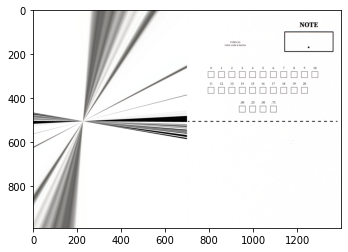

In [ ]:
plt.imshow( stacked)

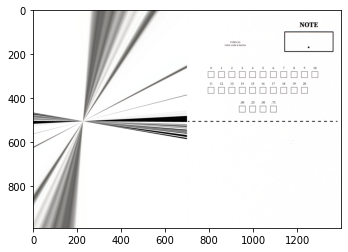

In [ ]:
plt.imshow(stacked)